In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [28]:
data=pd.read_csv("exchange_rate.csv")
data.head()


,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [30]:
data['date']=pd.to_datetime(data['date'],errors='coerce')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2998 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB


In [32]:
data=data.dropna(subset=['date'])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2998 non-null   datetime64[ns]
 1   Ex_rate  2998 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 70.3 KB


In [34]:
data=data.sort_values('date')

In [35]:
data=data.set_index('date')

In [36]:
data.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7500
1990-01-03,0.7471
1990-01-04,0.7587
1990-01-05,0.7852


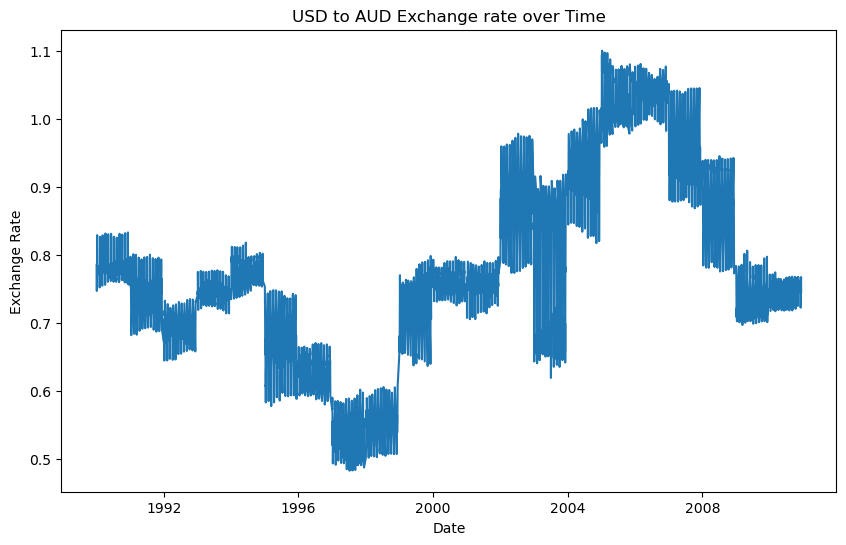

In [37]:
plt.figure(figsize=(10,6))
plt.plot(data['Ex_rate'])
plt.title('USD to AUD Exchange rate over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [38]:
from statsmodels.tsa.stattools import adfuller


In [39]:
result=adfuller(data['Ex_rate'])
result

(np.float64(-1.539931907683825),
 np.float64(0.5136733116580308),
 24,
 2973,
 {'1%': np.float64(-3.432551464895929),
  '5%': np.float64(-2.8625126635320393),
  '10%': np.float64(-2.567287774919901)},
 np.float64(-16100.664423617352))

In [40]:
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -1.539931907683825
p-value: 0.5136733116580308


<Figure size 1000x400 with 0 Axes>

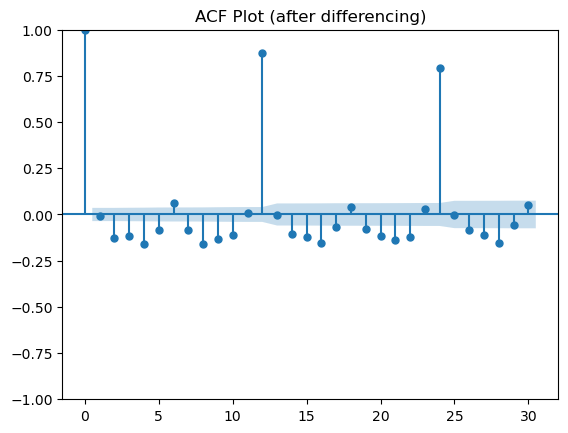

<Figure size 1000x400 with 0 Axes>

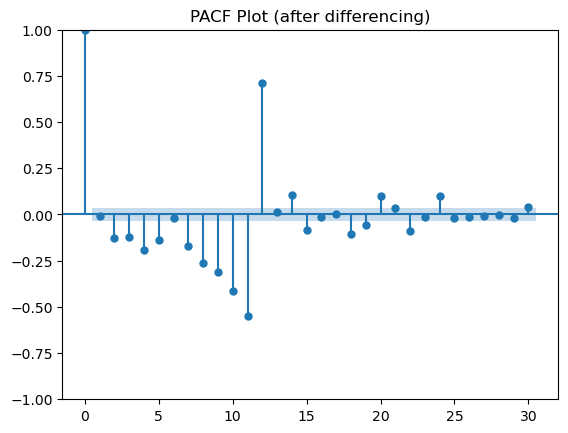

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Differenced series
diff_series = data['Ex_rate'].diff().dropna()

# Plot ACF
plt.figure(figsize=(10,4))
plot_acf(diff_series, lags=30)
plt.title("ACF Plot (after differencing)")
plt.show()

# Plot PACF
plt.figure(figsize=(10,4))
plot_pacf(diff_series, lags=30, method='ywm')
plt.title("PACF Plot (after differencing)")
plt.show()


In [42]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1)
model = ARIMA(data['Ex_rate'], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 2998
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5772.777
Date:                Tue, 18 Nov 2025   AIC                         -11539.555
Time:                        12:26:53   BIC                         -11521.539
Sample:                             0   HQIC                        -11533.074
                               - 2998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9661      0.006    162.916      0.000       0.955       0.978
ma.L1         -1.0000      1.926     -0.519      0.604      -4.775       2.775
sigma2         0.0012      0.002      0.522      0.6

In [43]:
forecast = model_fit.forecast(steps=30)
forecast

2998    0.746371
2999    0.747653
3000    0.748891
3001    0.750087
3002    0.751242
3003    0.752359
3004    0.753437
3005    0.754479
3006    0.755486
3007    0.756459
3008    0.757399
3009    0.758306
3010    0.759184
3011    0.760031
3012    0.760850
3013    0.761641
3014    0.762405
3015    0.763143
3016    0.763857
3017    0.764546
3018    0.765212
3019    0.765855
3020    0.766477
3021    0.767077
3022    0.767657
3023    0.768218
3024    0.768759
3025    0.769282
3026    0.769788
3027    0.770276
Name: predicted_mean, dtype: float64

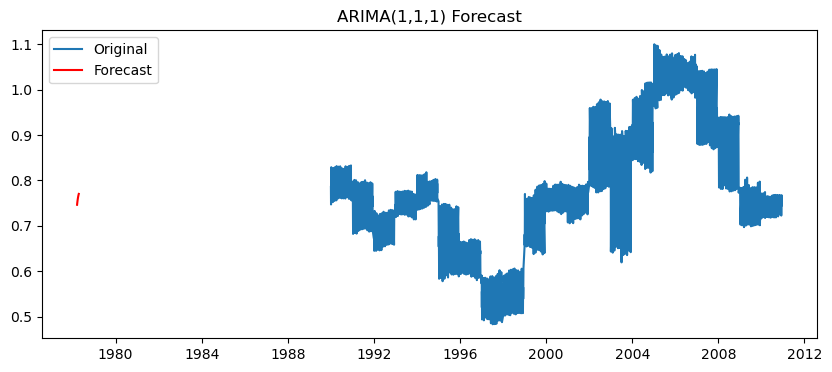

In [25]:
plt.figure(figsize=(10,4))
plt.plot(data['Ex_rate'], label="Original")
plt.plot(forecast, label="Forecast", color="red")
plt.title("ARIMA(1,1,1) Forecast")
plt.legend()
plt.show()


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train-test split
train_size = int(len(data) * 0.8)
train = data['Ex_rate'][:train_size]
test = data['Ex_rate'][train_size:]

# Fit ARIMA on training data
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Forecast for length of test set
pred = model_fit.forecast(steps=len(test))

# Evaluation metrics
mae = mean_absolute_error(test, pred)
rmse = np.sqrt(mean_squared_error(test, pred))
mape = np.mean(np.abs((test - pred) / test)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape, "%")


MAE: 0.19143494490042828
RMSE: 0.21936402414649464
MAPE: nan %
